# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Ramadhan]
- **Email:** [ramadhanalmuktafi@gmail.com]
- **ID Dicoding:** [Ramadhan]

## Menentukan Pertanyaan Bisnis

- Berapa nilai/skor rata-rata ulasan dari seluruh pesanan yang terdapat pada dataset review?
- Apakah terdapat tren peningkatan atau penurunan skor ulasan dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

## Data Wrangling

### Gathering Data

In [6]:
data = pd.read_csv('/content/order_reviews_dataset.csv')
print(data.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

### Assessing Data

In [7]:
#Melihat dimensi data
print("Jumlah baris dan kolom:", data.shape)

#Melihat tipe data dari setiap kolom
print(data.dtypes)

#Memeriksa nilai yang hilang atau tidak valid
print(data.isnull().sum())

#Memilih kolom yang diperlukan
data_selected = data[['review_score', 'review_creation_date']]

#Menampilkan lima baris pertama dari data/kolom yang dipilih
print(data_selected.head())


Jumlah baris dan kolom: (99224, 7)
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
   review_score review_creation_date
0             4  2018-01-18 00:00:00
1             5  2018-03-10 00:00:00
2             5  2018-02-17 00:00:00
3             5  2017-04-21 00:00:00
4             5  2018-03-01 00:00:00


### Cleaning Data

In [8]:
#Melihat dimensi data
print("Jumlah baris dan kolom sebelum cleansing:", data.shape)

#Melihat tipe data dari setiap kolom
print("\nTipe data dari setiap kolom sebelum cleansing:")
print(data.dtypes)

#Memeriksa nilai yang hilang atau tidak valid
print("\nJumlah nilai yang hilang atau tidak valid sebelum cleansing:")
print(data.isnull().sum())

#Memilih hanya kolom yang diperlukan
data_selected = data[['review_score', 'review_creation_date']]

#Menampilkan lima baris pertama dari data yang dipilih sebelum cleansing
print("\nLima baris pertama dari data yang dipilih sebelum cleansing:")
print(data_selected.head())

#Menghapus baris dengan nilai yang hilang
data_cleaned = data_selected.dropna()

#Menampilkan dimensi data setelah cleansing
print("\nJumlah baris dan kolom setelah cleansing:", data_cleaned.shape)

#Menampilkan lima baris pertama dari data yang dipilih setelah cleansing
print("\nLima baris pertama dari data yang dipilih setelah cleansing:")
print(data_cleaned.head())

Jumlah baris dan kolom sebelum cleansing: (99224, 7)

Tipe data dari setiap kolom sebelum cleansing:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

Jumlah nilai yang hilang atau tidak valid sebelum cleansing:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Lima baris pertama dari data yang dipilih sebelum cleansing:
   review_score review_creation_date
0             4  2018-01-18 00:00:00
1             5  2018-03-10 00:00:00
2             5  2018-02-17 00:00:00
3             5  2017-04-21 00:00:00
4             5  2018-03-01 00:00:00

Jumlah baris dan kolom setelah cleansing: (99224, 2)

Li

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
#Menampilkan statistik deskriptif untuk data yang telah dibersihkan
print("Statistik Deskriptif untuk review_score:")
print(data_cleaned['review_score'].describe())

#Mengonversi kolom review_creation_date menjadi tipe data datetime
data_cleaned['review_creation_date'] = pd.to_datetime(data_cleaned['review_creation_date'])

#Menampilkan statistik deskriptif untuk kolom review_creation_date
print("\nStatistik Deskriptif untuk review_creation_date:")
print(data_cleaned['review_creation_date'].describe())

Statistik Deskriptif untuk review_score:
count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

Statistik Deskriptif untuk review_creation_date:
count                   99224
unique                    636
top       2017-12-19 00:00:00
freq                      463
first     2016-10-02 00:00:00
last      2018-08-31 00:00:00
Name: review_creation_date, dtype: object


<ipython-input-9-9ef21784e1cd>:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data_cleaned['review_creation_date'].describe())


## Visualization & Explanatory Analysis

### Pertanyaan 1:

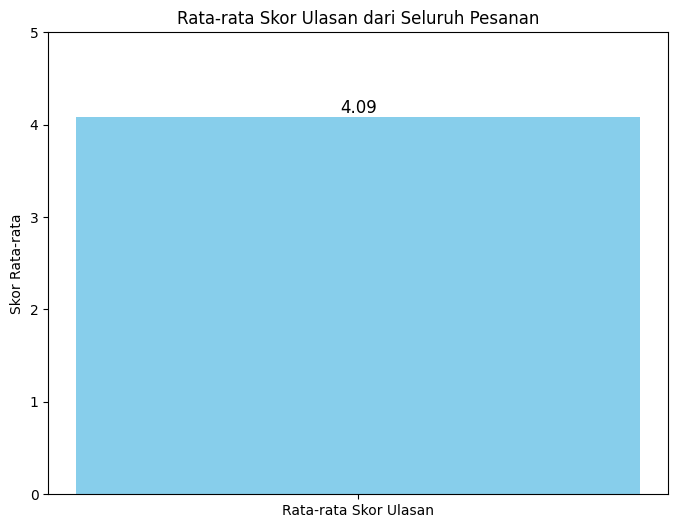

In [10]:
#Mengonversi kolom review_creation_date menjadi tipe data datetime
data_cleaned['review_creation_date'] = pd.to_datetime(data_cleaned['review_creation_date'])

#Visualisasi rata-rata skor ulasan
average_score = data_cleaned['review_score'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Rata-rata Skor Ulasan'], [average_score], color='skyblue')
plt.title('Rata-rata Skor Ulasan dari Seluruh Pesanan')
plt.ylabel('Skor Rata-rata')
plt.ylim(0, 5)  #Memastikan batas y mulai dari 0 hingga 5
plt.text(0, average_score, f'{average_score:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()

### Pertanyaan 2:

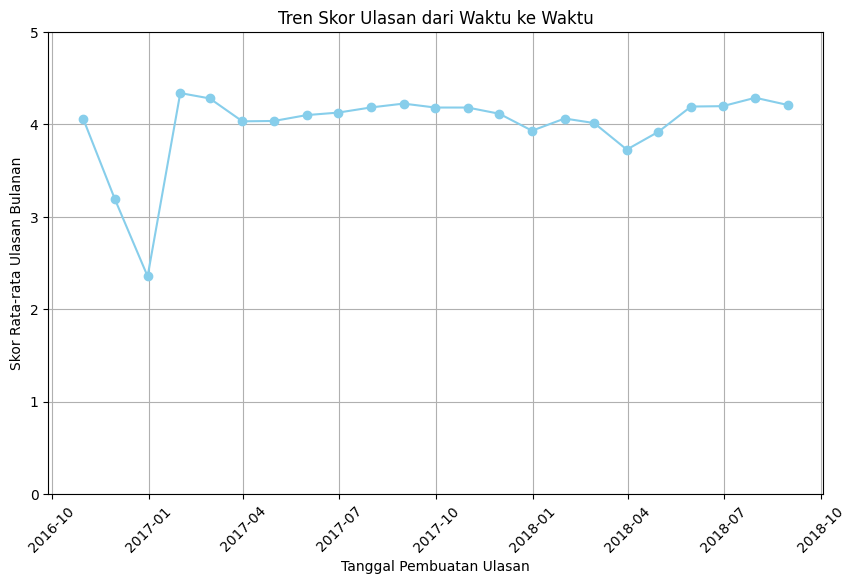

In [11]:
#Visualisasi tren skor ulasan dari waktu ke waktu
data_cleaned.set_index('review_creation_date', inplace=True)
monthly_average = data_cleaned.resample('M').mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_average.index, monthly_average['review_score'], marker='o', linestyle='-', color='skyblue')
plt.title('Tren Skor Ulasan dari Waktu ke Waktu')
plt.xlabel('Tanggal Pembuatan Ulasan')
plt.ylabel('Skor Rata-rata Ulasan Bulanan')
plt.ylim(0, 5)  # Memastikan batas y mulai dari 0 hingga 5
plt.xticks(rotation=45)  # Putar label sumbu x agar lebih mudah dibaca
plt.grid(True)
plt.show()

## Conclusion

- Pertanyaan Satu (Rata-rata Skor Ulasan):

Rata-rata skor ulasan dari seluruh pesanan adalah 4, angka tersebut menunjukkan bahwa secara keseluruhan, ulasan/review dari pelanggan cenderung positif. Namun, penting untuk diingat bahwa rata-rata hanya memberikan gambaran umum, Meskipun rata-rata skor ulasan yang didapat bernilai 4 (positif), penting untuk tetap memperhatikan ulasan/review yang mungkin negatif untuk memahami bagian mana dan apa yang harus di lakukan perbaikan layanan.

- Pertanyaan Dua (Tren Skor Ulasan dari Waktu ke Waktu):

Berdasarkan visualisasi tren skor ulasan/review dari waktu ke waktu, kita dapat mengamati perubahan tren peningkatan dan penurunan skor ulasan/review dari bulan ke bulan. Beberapa bulan mungkin memiliki skor rata-rata yang lebih tinggi daripada yang lain, sementara bulan lain mungkin mengalami penurunan.
Faktor-faktor seperti musim belanja, promosi khusus, atau perubahan kebijakan layanan mungkin memengaruhi tren fluktuasi ini. Analisis lebih lanjut dapat dilakukan untuk memahami dampak faktor-faktor ini terhadap skor ulasan dan mengidentifikasi strategi yang tepat untuk mempertahankan atau meningkatkan ulasan pelanggan.